In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_1samp
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import csv files for project
obs_df = pd.read_csv('observations.csv')
spe_df = pd.read_csv('species_info.csv')

In [4]:
# Print how many rows and columns for each dataframe
print('Shape Observations ' + str(obs_df.shape))
print(list(obs_df.columns))
print('Shape Species Information' + str(spe_df.shape))
print(list(spe_df.columns))


Shape Observations (23296, 3)
['scientific_name', 'park_name', 'observations']
Shape Species Information(5824, 4)
['category', 'scientific_name', 'common_names', 'conservation_status']


In [5]:
print(obs_df.head())
print(spe_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [6]:
print(obs_df.nunique())
print(spe_df.nunique())
print('Conservation Status Values: ')
print(spe_df.conservation_status.unique())
print('Category Values: ')
print(spe_df.category.unique())
print('Park Name Values: ')
print(obs_df.park_name.unique())

scientific_name    5541
park_name             4
observations        304
dtype: int64
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64
Conservation Status Values: 
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Category Values: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Park Name Values: 
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [7]:
# Change nan values to 'No Information' in the conservation_status column
#species = spe_df.dropna(subset=['conservation_status'])
spe_df.fillna('No Information', inplace=True)

# Verify nan value is gone
print('Conservation Status Values: ')
print(spe_df.conservation_status.unique())

Conservation Status Values: 
['No Information' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [8]:
obs_df.park_name = obs_df.park_name.str.replace('National Park','')
print('Park Name Values: ')
print(obs_df.park_name.unique())

Park Name Values: 
['Great Smoky Mountains ' 'Yosemite ' 'Bryce ' 'Yellowstone ']


In [9]:
print(spe_df[spe_df.scientific_name.duplicated(keep=False)])

            category                   scientific_name  \
4             Mammal                    Cervus elaphus   
5             Mammal            Odocoileus virginianus   
6             Mammal                        Sus scrofa   
8             Mammal                       Canis lupus   
10            Mammal          Urocyon cinereoargenteus   
...              ...                               ...   
5619  Vascular Plant  Panicum rigidulum var. rigidulum   
5638  Vascular Plant                    Setaria pumila   
5640  Vascular Plant                  Vulpia bromoides   
5643  Vascular Plant                     Vulpia myuros   
5750  Vascular Plant                   Rosa eglanteria   

                                           common_names conservation_status  
4                                         Wapiti Or Elk      No Information  
5                                     White-Tailed Deer      No Information  
6                                   Feral Hog, Wild Pig      No Infor

In [10]:
s_duplicates = spe_df[spe_df.scientific_name.duplicated(keep=False)]
print(f'Duplicates: {len(s_duplicates)}')
# Create a dataframe with the count of duplicate rows by scientific_name
duplicate_count = s_duplicates.groupby(['scientific_name']).conservation_status.count()
# Print the scientific_names with the highest duplicate counts and review the conservation_status
for name, status in duplicate_count.iteritems():
    if int(status) > 2:
        display(s_duplicates[s_duplicates.scientific_name == name])

Duplicates: 557


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",No Information
3050,Mammal,Castor canadensis,American Beaver,No Information
4475,Mammal,Castor canadensis,Beaver,No Information


,category,scientific_name,common_names,conservation_status
156,Bird,Columba livia,Rock Dove,No Information
3138,Bird,Columba livia,"Common Pigeon, Rock Dove, Rock Pigeon",No Information
4513,Bird,Columba livia,Rock Pigeon,No Information


,category,scientific_name,common_names,conservation_status
2242,Vascular Plant,Holcus lanatus,"Common Velvet Grass, Velvetgrass",No Information
4236,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Yorkshire-Fog",No Information
5600,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",No Information


,category,scientific_name,common_names,conservation_status
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",No Information
3488,Vascular Plant,Hypochaeris radicata,"Spotted Cats-Ear, Hairy Cats-Ear, Gosmore",No Information
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",No Information


,category,scientific_name,common_names,conservation_status
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern
3042,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
4467,Mammal,Myotis lucifugus,Little Brown Myotis,Species of Concern


,category,scientific_name,common_names,conservation_status
26,Mammal,Procyon lotor,"Common Raccoon, Raccoon",No Information
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon, Raccoon",No Information
4459,Mammal,Procyon lotor,Raccoon,No Information


,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),No Information
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",No Information
4451,Mammal,Puma concolor,Mountain Lion,No Information


,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,No Information
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",No Information
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,No Information


In [11]:
# Drop duplicates
spe_df.drop_duplicates(inplace=True, subset='scientific_name', keep='first')
spe_df.reset_index(drop=True, inplace=True)

In [12]:
# Create categorical values for the column conservation_status yo be used later for sorting and data manipulation
spe_df.conservation_status = pd.Categorical(spe_df.conservation_status, 
                                               categories=['No Information', 'Species of Concern', 
                                               'In Recovery', 'Threatened', 'Endangered'], 
                                               ordered=True)

In [13]:
worst_cases = s_duplicates.groupby('scientific_name').conservation_status.max()
worst_cases = worst_cases.sort_values(axis=0, ascending=True)
display(worst_cases)

scientific_name
Canis lupus                                In Recovery
Agrostis capillaris                     No Information
Panicum rigidulum var. rigidulum        No Information
Parietaria pensylvanica                 No Information
Passerella iliaca                       No Information
                                           ...        
Myotis lucifugus                    Species of Concern
Nycticorax nycticorax               Species of Concern
Lasionycteris noctivagans           Species of Concern
Eptesicus fuscus                    Species of Concern
Oncorhynchus mykiss                         Threatened
Name: conservation_status, Length: 274, dtype: object

In [14]:
# Update the status for each duplicate that we kept
for species, worst_risk in worst_cases.iteritems():
    spe_df.conservation_status[spe_df.scientific_name == species] = worst_risk
spe_df

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information
1,Mammal,Bos bison,"American Bison, Bison",No Information
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information
...,...,...,...,...
5536,Vascular Plant,Solanum parishii,Parish's Nightshade,No Information
5537,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Information
5538,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Information
5539,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Information


In [15]:
# Print data for each conservation status 

print('Conservation Status:')
print(spe_df.groupby('conservation_status').scientific_name.count())

Conservation Status:
conservation_status
No Information        5362
Species of Concern     151
In Recovery              4
Threatened              10
Endangered              14
Name: scientific_name, dtype: int64


In [16]:
# Create a protected column with Protected or Unprotected values
spe_df['protected'] = spe_df.conservation_status.apply(lambda x: 'Protected' if x != 'No Information' else 'Unprotected')

In [17]:
# Create a table to visualize the Conservation Status vs Category excluding excluding the Unprotected value in the protected column
conservation_table = spe_df[spe_df.protected == 'Protected'].groupby(['category','conservation_status']).scientific_name.count().unstack()
conservation_table.columns
print("Conservation Status Table except 'Unprotected'")
conservation_table

Conservation Status Table except 'Unprotected'


conservation_status,No Information,Species of Concern,In Recovery,Threatened,Endangered
category,,,,,
Amphibian,0,4,0,2,1
Bird,0,68,3,0,4
Fish,0,4,0,4,3
Mammal,0,22,1,2,5
Nonvascular Plant,0,5,0,0,0
Reptile,0,5,0,0,0
Vascular Plant,0,43,0,2,1


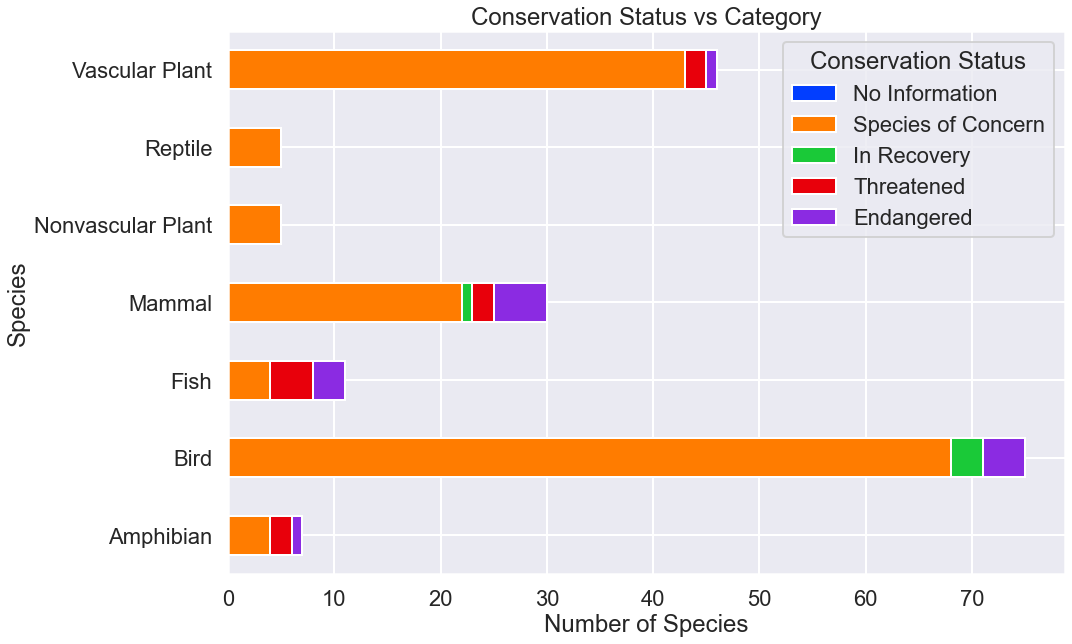

In [18]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
ax = conservation_table.plot(kind='barh', figsize=(15,10), stacked=True)
plt.title('Conservation Status vs Category')
ax.set_xlabel('Number of Species')
ax.set_ylabel('Species')
# Change legend title to ?Conservation Status' that look beter than the original column name
plt.legend(title='Conservation Status')
plt.show()

In [19]:
category_protected = conservation_table.sum(axis=1).reset_index(name='total')
# Sort dataframe by the total column descending
category_protected = category_protected.sort_values('total', ascending=False)
category_protected

,category,total
1,Bird,75
6,Vascular Plant,46
3,Mammal,30
2,Fish,11
0,Amphibian,7
4,Nonvascular Plant,5
5,Reptile,5


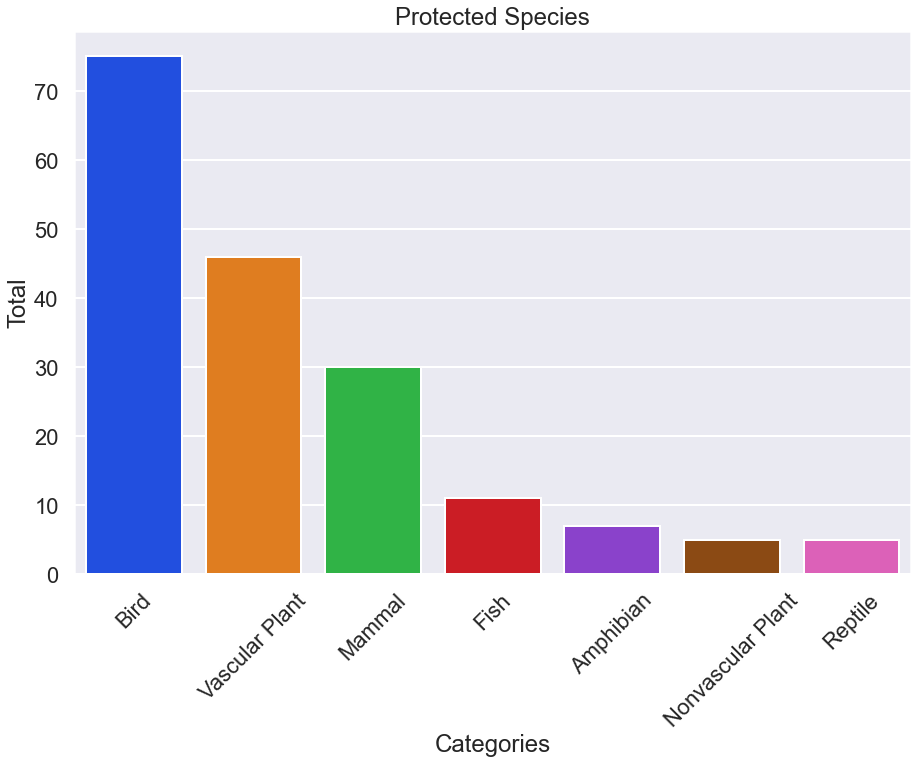

In [20]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
# Creates the figure
plt.subplots(figsize=(15, 10))

# Plot the data
ax = sns.barplot(data=category_protected, x="category", y = "total")
ax.set_title('Protected Species')
# Rotate labels to better accomodate
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('Categories')
plt.ylabel('Total')
plt.show()

In [21]:
#This is one way of creating the dataframe, both will give the same result
#category_all = spe_df.groupby(['category','protected']).scientific_name.count().reset_index().pivot(index='category',columns='protected', values='scientific_name').reset_index()
category_all = spe_df.groupby(['category','protected']).scientific_name.count().unstack().reset_index()
category_all

protected,category,Protected,Unprotected
0,Amphibian,7,72
1,Bird,75,413
2,Fish,11,114
3,Mammal,30,146
4,Nonvascular Plant,5,328
5,Reptile,5,73
6,Vascular Plant,46,4216


In [22]:
# Add a pct_protected column and calculate the percentage of protected species by category
category_all['pct_protected'] = round(category_all.Protected / (category_all.Protected + category_all.Unprotected) * 100, 2)
# Sort table by `pct_protected` column
category_all = category_all.sort_values('pct_protected', ascending=False)
category_all

protected,category,Protected,Unprotected,pct_protected
3,Mammal,30,146,17.05
1,Bird,75,413,15.37
0,Amphibian,7,72,8.86
2,Fish,11,114,8.80
5,Reptile,5,73,6.41
4,Nonvascular Plant,5,328,1.50
6,Vascular Plant,46,4216,1.08


TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

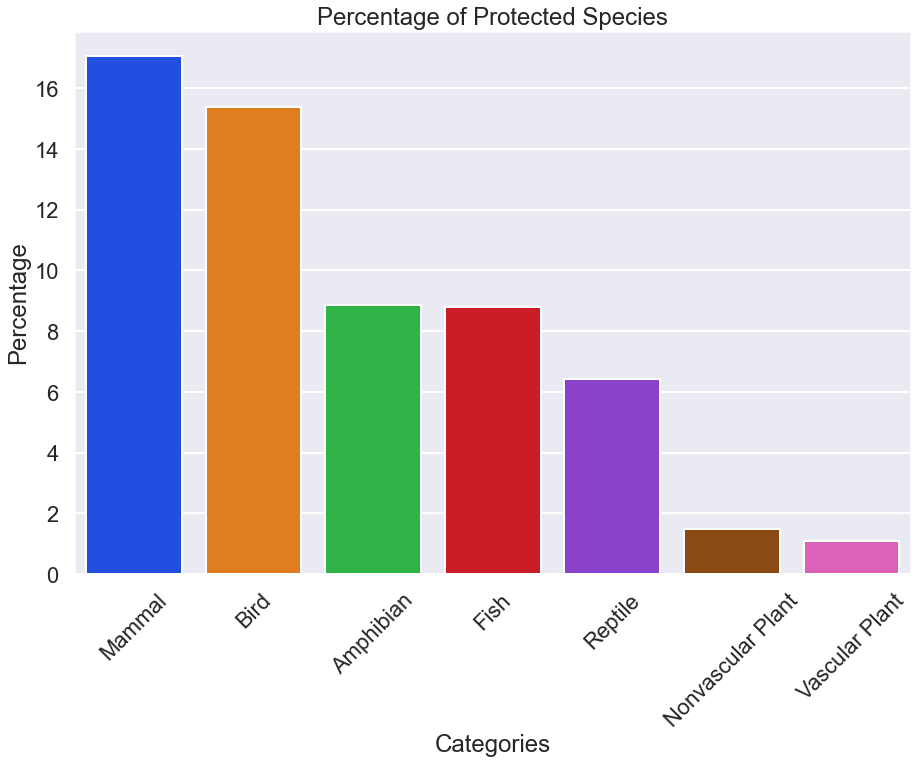

In [23]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
# Creates the figure
plt.subplots(figsize=(15, 10))
# Plot the data
ax = sns.barplot(data=category_all, x='category', y='pct_protected')
ax.set_title('Percentage of Protected Species')
# Rotate labels to better accomodate
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('Categories')
plt.ylabel('Percentage')
# Format Y labels with % and no decimal points
ax.yaxis.set_major_formatter(lambda x,pos :'{:.0f}%'.format(x))
plt.show()

In [24]:
# Join
joined_df = spe_df.merge(obs_df, on='scientific_name', how='outer')
print(joined_df.head())
print('joined_df shape: ' + str(joined_df.shape))
print('obs_df shape: ' + str(obs_df.shape))
print('spe_df shape: ' + str(spe_df.shape))

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status    protected               park_name  observations  
0      No Information  Unprotected                  Bryce            130  
1      No Information  Unprotected            Yellowstone            270  
2      No Information  Unprotected  Great Smoky Mountains             98  
3      No Information  Unprotected               Yosemite            117  
4      No Information  Unprotected               Yosemite            128  
joined_df shape: (23296, 7)
obs_df shape: (23296, 3)
spe_df shape: (5541, 5)


In [25]:
# Create observations and category dataframe
obs_cat_df = joined_df[['category', 'observations']].groupby(['category']).observations.sum().sort_values(ascending=False).reset_index()
obs_cat_df

,category,observations
0,Vascular Plant,2555090
1,Bird,292833
2,Nonvascular Plant,190653
3,Mammal,116696
4,Fish,70818
5,Reptile,44678
6,Amphibian,43971


TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

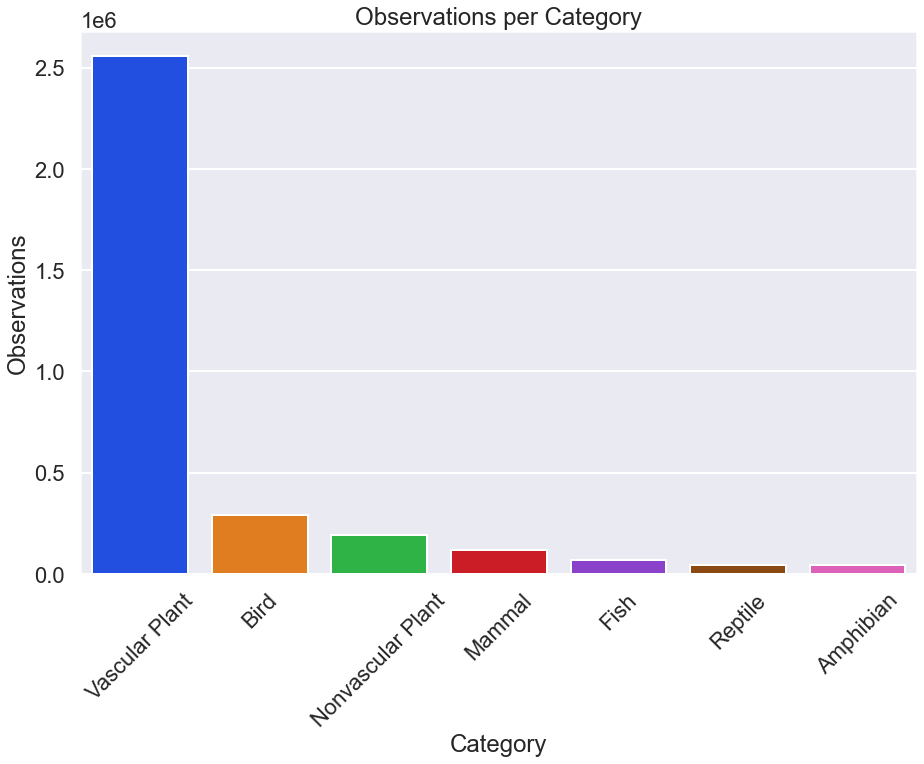

In [26]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=obs_cat_df, x='category', y='observations')
plt.title('Observations per Category')
# Rotate labels to better accomodate
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel('Category')
ax.set_ylabel('Observations')
# Adjust Y labels format to thousands (K) for better reading
ax.yaxis.set_major_formatter(lambda x, pos: '0' if x==0 else '{:.0f}K'.format(x * 1e-3))
plt.show()

TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

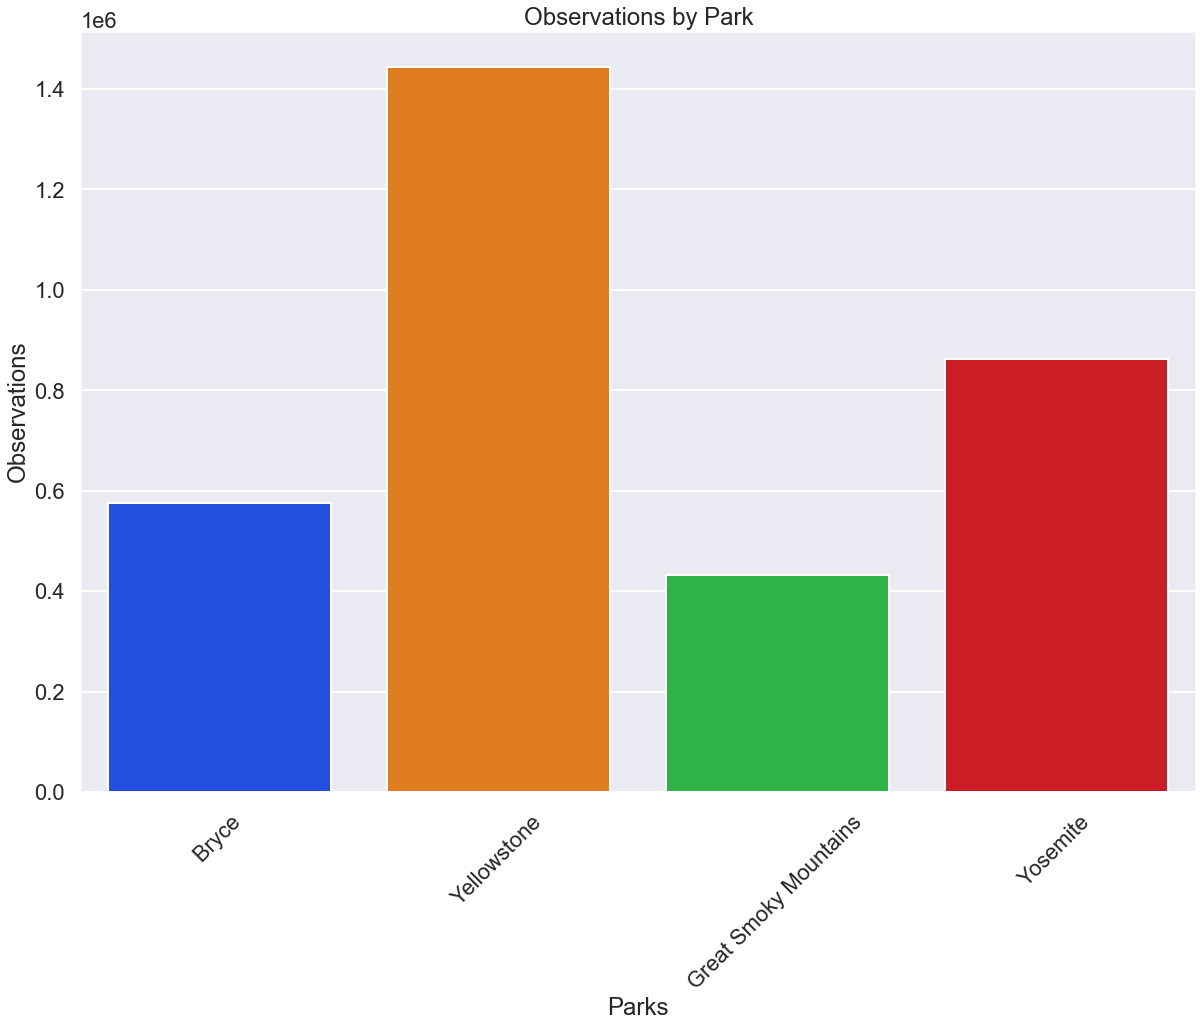

In [27]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
plt.subplots(figsize=(20, 14))
ax = sns.barplot(data=joined_df, x='park_name', y='observations', estimator=sum, ci=None)
plt.title('Observations by Park')
# Rotate labels to better accomodate
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel('Parks')
ax.set_ylabel('Observations')
# Adjust Y labels to thousands (K) for better reading
ax.yaxis.set_major_formatter(lambda x, pos: '0' if x==0 else '{:.0f}K'.format(x * 1e-3))
plt.show()

In [28]:
# Create observations and category df
park_obs_cat_df = joined_df[['park_name','category', 'observations']].groupby(['park_name','category']).observations.sum().unstack()
# Change numbers to percentages
park_obs_cat_df = park_obs_cat_df.apply(lambda x: round(x/x.sum()*100,2), axis=1)
# View the Dataframe
park_obs_cat_df

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce,1.28,8.97,2.16,3.57,5.73,1.38,76.92
Great Smoky Mountains,1.32,8.74,2.13,3.48,5.76,1.32,77.26
Yellowstone,1.35,8.82,2.12,3.52,5.75,1.35,77.10
Yosemite,1.33,8.83,2.16,3.51,5.77,1.33,77.08


TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

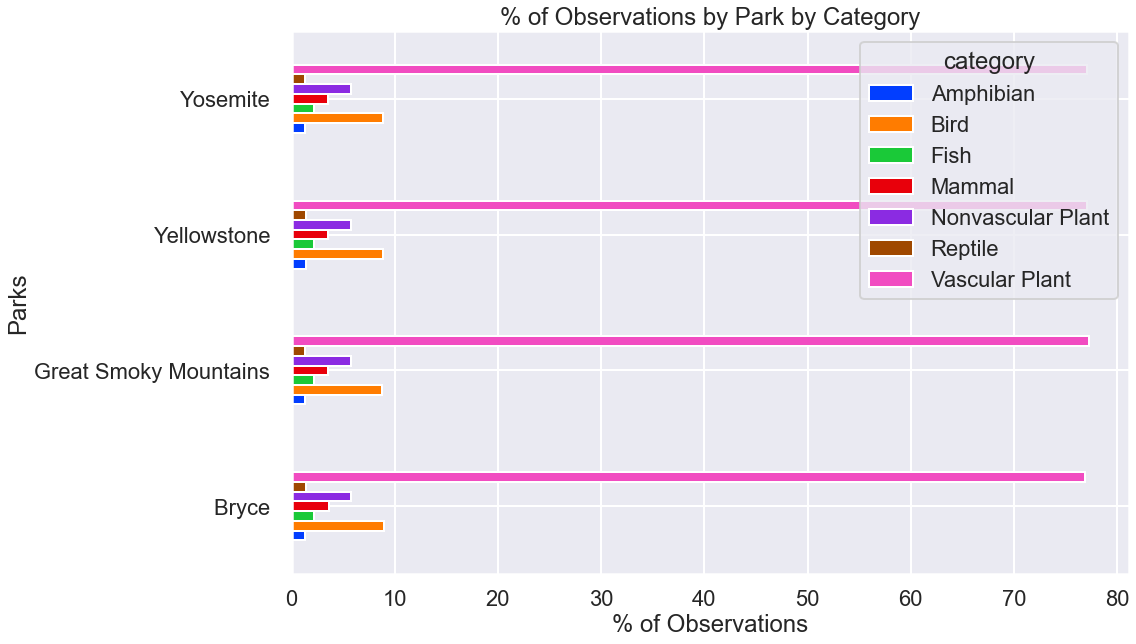

In [29]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
ax = park_obs_cat_df.plot(kind='barh', figsize=(15, 10))
plt.title('% of Observations by Park by Category')
# Rotate labels to better accomodate
plt.ylabel('Parks')
plt.xlabel('% of Observations')
# Format X labels with % and no decimal points
ax.xaxis.set_major_formatter(lambda x,pos :'{:.0f}%'.format(x))
# Set legend title to 'Category' since the column nam has lowercase 'c'
plt.legend(title='Category')
plt.show()

In [30]:
# We will run a chi2 contingency
# Load libary 
from scipy.stats import chi2_contingency

# pre-set threshold
significance_threshold = 0.05
# run a chi-square test
contingency = pd.crosstab(spe_df.protected, spe_df.category)
print(contingency)
chi2, pval, dof, expected = chi2_contingency(contingency, correction=False)
# determine significance here:
result = result = ('significant' if pval < significance_threshold else 'not significant')
print('There is ' + result + ' result with pval being '+ str(pval))

category     Amphibian  Bird  Fish  Mammal  Nonvascular Plant  Reptile  \
protected                                                                
Protected            7    75    11      30                  5        5   
Unprotected         72   413   114     146                328       73   

category     Vascular Plant  
protected                    
Protected                46  
Unprotected            4216  
There is significant result with pval being 5.146759135430123e-89


In [31]:
clean_spe_df = spe_df[spe_df.protected == 'Protected']
clean_spe_df

,category,scientific_name,common_names,conservation_status,protected
7,Mammal,Canis latrans,Coyote,Species of Concern,Protected
8,Mammal,Canis lupus,Gray Wolf,In Recovery,Protected
9,Mammal,Canis rufus,Red Wolf,Endangered,Protected
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,Protected
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,Protected
...,...,...,...,...,...
5049,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern,Protected
5140,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern,Protected
5166,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern,Protected
5175,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern,Protected


In [32]:
# Create a new contingency table for just the protected species
contingency2 = pd.crosstab(clean_spe_df.conservation_status, clean_spe_df.category)
print(contingency2)

# run a chi-square test
chi2, pval, dof, expected = chi2_contingency(contingency2, correction=False)
# determine significance here:
result = result = ('significant' if pval < significance_threshold else 'not significant')
print('There is ' + result + ' result with pval being '+ str(pval))

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Species of Concern           4    68     4      22                  5   
In Recovery                  0     3     0       1                  0   
Threatened                   2     0     4       2                  0   
Endangered                   1     4     3       5                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Species of Concern         5              43  
In Recovery                0               0  
Threatened                 0               2  
Endangered                 0               1  
There is significant result with pval being 7.124995647486312e-05
